# LAB14 tutorial for Machine Learning <br > Q-Learning
> The document description are designed by JIa Yanhong in 2022. Nov. 23th
------

## Objective

- Understand the theory of Q-Learning
- Be able to code from scratch a Q-Learning agent.
- Be able to use **Gym**, the environment library.
- Complete the LAB assignment and submit it to BB or sakai.

------

## Introduction for Q-Learning
### What is Q-Learning?

Q-Learning is an **off-policy value-based method that uses a TD approach to train its action-value function:**

- **Off-policy**: we'll talk about that at the end of this chapter.
- **Value-based method**: finds the optimal policy indirectly by training a value or action-value function that will tell us the value of each state or each state-action pair.
- **Uses a TD approach**: updates its action-value function at each step instead of at the end of the episode.

###  Q-Function

**Q-Learning is the algorithm we use to train our Q-Function**, an **action-value function** that determines the value of being at a particular state and taking a specific action at that state.

<img src="images/Bellman_Equation_63ce32c644-166962529879935.png" alt="Bellman Equation" style="zoom:80%;" />

Given a state and action, our Q Function outputs a state-action value (also called Q-value)

The **Q comes from "the Quality" of that action at that state.**

###  Q-table

Internally, our Q-function has **a Q-table, a table where each cell corresponds to a state-action value pair value.** Think of this Q-table as **the memory or cheat sheet of our Q-function.**

If we take this maze example:

<img src="images/Maze-1.jpg" alt="Maze example " style="zoom:100%;" />

The Q-Table is initialized. That's why all values are = 0. This table **contains, for each state, the four state-action values.**

<img src="images/Maze-2.jpg" alt="Maze example" style="zoom:80%;" />

Here we see that the **state-action value of the initial state and going up is 0:**

<img src="images/Maze-3.jpg" alt="Maze example" style="zoom:80%;" />

Therefore, Q-function contains a Q-table **that has the value of each-state action pair.** And given a state and action, **our Q-Function will search inside its Q-table to output the value.**

<img src="images/Q-function-2.jpg" alt="Q-function" style="zoom:80%;" />



Given a state and action pair, our Q-function will search inside its Q-table to output the state-action pair value (the Q value).



If we recap, *Q-Learning* **is the RL algorithm that:**

- Trains *Q-Function* (an **action-value function**) which internally is a *Q-table* **that contains all the state-action pair values.**
- Given a state and action, our Q-Function **will search into its Q-table the corresponding value.**
- When the training is done, **we have an optimal Q-function, which means we have optimal Q-Table.**
- And if we **have an optimal Q-function**, we **have an optimal policy** since we **know for each state what is the best action to take.**

<img src="images/link-value-policy.jpg" alt="Link value policy" style="zoom:33%;" />

But, in the beginning, **our Q-Table is useless since it gives arbitrary values for each state-action pair** (most of the time, we initialize the Q-Table to 0 values). But, as we'll **explore the environment and update our Q-Table, it will give us better and better approximations.**

<img src="images/Q-learning-1.jpg" alt="Q-learning" style="zoom:60%;" />

We see here that with the training, our Q-Table is better since, thanks to it, we can know the value of each state-action pair.

So now that we understand what Q-Learning, Q-Function, and Q-Table are, **let's dive deeper into the Q-Learning algorithm**.

### The Q-Learning algorithm

**The Q-Learning algorithm** flow is as follows:

<img src="images/Q_Learning_Process_134331efc1.png" alt="Q-Learning Process " style="zoom:80%;" />

Here is the Q-Learning pseudocode:

<img src="images/image-20221128171006334.png" alt="image-20221128171006334 " style="zoom:80%;" />



#### Step 1: We initialize the Q-Table

<img src="images/Q-learning-3.jpg" alt="Q-learning " style="zoom:80%;" />

We need to initialize the Q-Table for each state-action pair. **Most of the time, we initialize with values of 0.**

#### Step 2: Choose action using Epsilon Greedy Strategy

<img src="images/Q-learning-4.jpg" alt="Q-learning" style="zoom:44%;" />

Epsilon Greedy Strategy is a policy that handles the exploration/exploitation trade-off.

The idea is that we define epsilon ɛ = 1.0:

- *With probability 1 — ɛ* : we do **exploitation** (aka our agent selects the action with the highest state-action pair value).
- With probability ɛ: **we do exploration** (trying random action).

At the beginning of the training, **the probability of doing exploration will be huge since ɛ is very high, so most of the time, we'll explore.** But as the training goes on, and consequently our **Q-Table gets better and better in its estimations, we progressively reduce the epsilon value** since we will need less and less exploration and more exploitation.

<img src="images/Q-learning-5.jpg" alt="Q-learning " style="zoom:60%;" />

#### Step 3: Perform action $A_t$, gets reward $R_{t+1} $and next state $S_{t+1}$

<img src="images/Q-learning-6.jpg" alt="Q-learning " style="zoom:50%;" />

#### Step 4: Update $Q(S_t, A_t)$

Remember that in TD Learning, we update our policy or value function (depending on the RL method we choose) **after one step of the interaction.**

To produce our TD target, **we used the immediate reward R_{t+1}\*R\**t\*+1 plus the discounted value of the next state best state-action pair** (we call that bootstrap).

<img src="images/Q-learning-7.jpg" alt="Q-learning " style="zoom:60%;" />

Therefore, our $Q(S_t, A_t)$ **update formula goes like this:**

<img src="images/Q-learning-8.jpg" alt="Q-learning " style="zoom:60%;" />

To get the **best next-state-action pair value**, we use a greedy policy to select the next best action.

**Note that this is not an epsilon greedy policy, this will always take the action with the highest state-action value.**

**It's why we say that this is an off-policy algorithm.**

### **Off-policy vs On-policy**

<img src="images/off-on-4.jpg" alt="Off-on policy " style="zoom:67%;" />





## Q-Learning tutorials
Two Q-Learning tutorials, one for us to do together and one for Assignment. The gym environment of the two tutorials is as follows:
🎮 Environments: 
- [FrozenLake-v1](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)
- [Taxi-v3](https://www.gymlibrary.ml/environments/toy_text/taxi/)


### Q-Learning with FrozenLake-v1

#### Install dependencies

In [29]:
# %%capture
# ! pip install gym==0.24
# ! pip install pygame
# ! pip install numpy
# ! pip install imageio imageio_ffmpeg

#### Import the packages

In [30]:
import numpy as np
import gym
import random
import imageio
import tqdm

### Create Frozen Lake  environment 
We're going to train our Q-Learning agent **to navigate from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoid holes (H)**.

We can have two sizes of environment:
- `map_name="4x4"`: a 4x4 grid version
- `map_name="8x8"`: a 8x8 grid version


The environment has two modes:
- `is_slippery=False`: The agent always move in the intended direction due to the non-slippery nature of the frozen lake.
- `is_slippery=True`: The agent may not always move in the intended direction due to the slippery nature of the frozen lake (stochastic).

You can also custom your own grid using:

```python
desc=["SFFF", "FHFH", "FFFH", "HFFG"]
gym.make('FrozenLake-v1', desc=desc, is_slippery=True)
```

but we'll use the default environment for now.

In [31]:
# Create the FrozenLake-v1 environment using 4x4 map and non-slippery version
env = gym.make("FrozenLake-v1",map_name="4x4",is_slippery=False)

#### Understanding the FrozenLake environment 


In [32]:
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 4


We see with `Observation Space Shape Discrete(16)` that the observation is a value representing the **agent’s current position as current_row * nrows + current_col (where both the row and col start at 0)**. 

For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. **For example, the 4x4 map has 16 possible observations.**


For instance, at this state = 0

In [33]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


The action space (the set of possible actions the agent can take) is discrete with 4 actions available 🎮:
- 0: GO LEFT
- 1: GO DOWN
- 2: GO RIGHT
- 3: GO UP

Reward function 💰:
- Reach goal: +1
- Reach hole: 0
- Reach frozen: 0

#### Create and Initialize the Q-table

It's time to initialize our Q-table! To know how many rows (states) and columns (actions) to use, we need to know the action and observation space. OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [34]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  16  possible states
There are  4  possible actions


In [35]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

In [36]:
Qtable_frozenlake = initialize_q_table(state_space, action_space)

#### Define the epsilon-greedy policy


In [37]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  # Randomly generate a number between 0 and 1
  random_int = random.uniform(0,1)
  # if random_int > greater than epsilon --> exploitation
  if random_int > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = np.argmax(Qtable[state])
  # else --> exploration
  else:
    action = env.action_space.sample()
  
  return action

#### Define the hyperparameters
The exploration related hyperparamters are some of the most important ones. 

- We need to make sure that our agent **explores enough the state space** in order to learn a good value approximation, in order to do that we need to have progressive decay of the epsilon.
- If you decrease too fast epsilon (too high decay_rate), **you take the risk that your agent is stuck**, since your agent didn't explore enough the state space and hence can't solve the problem.

In [38]:
# Training parameters
n_training_episodes = 10000  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
env_id = "FrozenLake-v1"     # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate
eval_seed = []               # The evaluation seed of the environment

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability 
decay_rate = 0.0005            # Exponential decay rate for exploration prob

#### Training the model

In [39]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  bar = tqdm.tqdm(total=n_training_episodes)
  for episode in range(n_training_episodes):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False

    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = epsilon_greedy_policy(Qtable, state, epsilon)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, done, info = env.step(action)

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action]) 

      # If done, finish the episode
      if done:
        break
      
      # Our state is the new state
      state = new_state
    bar.update()
  return Qtable

In [40]:
Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)

100%|██████████| 10000/10000 [00:02<00:00, 4866.37it/s]


#### Tranined Q-Learning table

In [41]:
Qtable_frozenlake

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

#### Model evaluation
- Normally you should have mean reward of 1.0
- It's relatively easy since the state space is really small (16). What you can try to do is [to replace with the slippery version](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/).

In [42]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  :param seed: The evaluation seed array (for taxi-v3)
  """
  episode_rewards = []
  for episode in range(n_eval_episodes):
    if seed:
      state = env.reset(seed=seed[episode])
    else:
      state = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0
    
    for step in range(max_steps):
      # Take the action (index) that have the maximum expected future reward given that state
      action = np.argmax(Q[state][:])
      new_state, reward, done, info = env.step(action)
      total_rewards_ep += reward
        
      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [43]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

Mean_reward=1.00 +/- 0.00


### Visualizing the results

In [44]:
def record_video(env, Qtable, out_directory, fps=1):
  images = []  
  done = False
  
  state = env.reset(seed=random.randint(0,500))
  #state = env.reset()
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(Qtable[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

Saving animated file as gif with 1 frame per second

In [45]:
video_path="replay.gif"
video_fps=1

In [46]:
record_video(env, Qtable_frozenlake, video_path, video_fps)

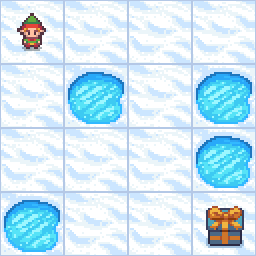

: 

In [47]:
from IPython.display import Image
Image('replay.gif')

## LAB Assignment
Please finish the **Exercise** and answer **Questions**.
### Exercise ( Q-Learning with Taxi-v3 🚕) (100 Points)

In this exercise, you should complete the Q-learning algorithm using the Taxi-v3 environment in the gym

In Taxi-v3 🚕, there are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.
<div align="center"><img src="images/image-20220805133926061.png" alt="image-20220805133926061" style="zoom:80%;" /></div>

### Step 0 Import the packages

In [ ]:
import numpy as np
import gym
import random
import imageio
import tqdm

###  Step 1 Create Taxi-v3 🚕  environment 
Using the API imported from gym

In [ ]:
env = gym.make('Taxi-v3')
env.render()

There are **500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger** (including the case when the passenger is in the taxi), and **4 destination locations.**


In [ ]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

In [ ]:
action_space = env.action_space.n
print("There are ", action_space, " possible actions")

The action space (the set of possible actions the agent can take) is discrete with **6 actions available 🎮**:
- 0: move south
- 1: move north
- 2: move east
- 3: move west
- 4: pickup passenger
- 5: drop off passenger

Reward function 💰:
- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

###  Step 2  Create the Q-table and initialize it

You can use the gym api to fetch the dimension of action space and state space

In [ ]:
action_space = env.action_space.n
state_space = env.observation_space.n

# Please complete this initialization in this line
Q_table = None

###  Step 3 Configure the hyperparameters

In [ ]:
total_episodes = 100000        # 一共玩多少局游戏
total_test_episodes = 100     # 测试中一共走几步
max_steps = 99                # Max steps per episode 每一局游戏最多走几步

learning_rate = 0.5           # Learning rate
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability 
decay_rate = 0.008            # Exponential decay rate for exploration prob


test_seed = [16,54,165,177,191,191,120,80,149,178,48,38,6,125,174,73,50,172,100,148,146,6,25,40,68,148,49,167,9,97,164,176,61,7,54,55,
 161,131,184,51,170,12,120,113,95,126,51,98,36,135,54,82,45,95,89,59,95,124,9,113,58,85,51,134,121,169,105,21,30,11,50,65,12,43,82,145,152,97,106,55,31,85,38,
 112,102,168,123,97,21,83,158,26,80,63,5,81,32,11,28,148] # Evaluation seed, this ensures that all classmates agents are trained on the same taxi starting position
    

###  Step 4 Q Learning algorithm

Note: The formula of Q table update(Bellman equation)
    ![Bellman equation](https://raw.githubusercontent.com/hanruihua/NoteBook/master/AI-Note/equation.png)

In [ ]:
bar = tqdm.tqdm(total=total_episodes)
sample_rewards = []
for episode in range(total_episodes):
    state= env.reset()
    step=0
    done=False
    sample_reward = 0 
    while True:
        #TODO: Please complete this action selection in this line via the maximum value
        action = None
        
        # TODO:fetech the new state and reward by gym API
        new_state, reward, done, info = None
        # Calculate the reward of this episode
        sample_reward += reward
        
        # TODO: Update the Q table 
        # Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q_table[state, action] = None
        
        # Update the state
        state = new_state
        
        #store the episode reward
        if done == True:
            sample_rewards.append(sample_reward)
            break
    # Reduced exploration probability (due to decreasing uncertainty)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)         
    # print the average reward over 1000 episodes
    if episode%1000 == 0:
        mean_reward = np.mean(sample_rewards)
        sample_rewards = []
        #print(str(episode)+": average reward:" + str(mean_reward))
        bar.set_description(str(episode)+": average reward:" + str(mean_reward))
    bar.update()

###  Step 5 Model evaluation

In [ ]:
fps=5
bar = tqdm.tqdm(total=total_test_episodes)
env.reset()
rewards=[]
images = [] 
for episode in range(total_test_episodes):
    state = env.reset(seed=test_seed[episode])
    step = 0
    done =False
    total_rewards = 0
   
    for step in range(max_steps):
        img = env.render(mode='rgb_array')
        images.append(img)
        #TODO:action selection
        action = None
        #TODO:fetech the new state and reward by gym API
        new_state, reward, done, info = None
        
        total_rewards += reward
        if done:
            rewards.append(total_rewards)
            break
        state = new_state
     
env.close()
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")
imageio.mimsave('taxi-v3.gif', [np.array(img) for i, img in enumerate(images)], fps=fps)


###  Step 6 Visualizing the results

In [ ]:
from IPython.display import Image
#Image('taxi-v3.gif')